# Healthcare – Persistency of a Drug

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Read Data

In [2]:
file = pd.ExcelFile('Healthcare_dataset.xlsx')
df = pd.read_excel(file, 'Dataset')

Data Understanding

In [3]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

What type of data you have got for analysis?

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ptid,3424,3424,P893,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Persistency_Flag,3424,2,Non-Persistent,2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,3424,2,Female,3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,3424,4,Caucasian,3148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,3424,3,Not Hispanic,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Risk_Hysterectomy_Oophorectomy,3424,2,N,3370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Estrogen_Deficiency,3424,2,N,3413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Immobilization,3424,2,N,3410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Recurring_Falls,3424,2,N,3355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What are the problems in the data (number of NA values, outliers, skewed etc)?

In [7]:
df.isna().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

Data Cleaning

In [8]:
# There are some names which can be grouped together, some names can be made short (for eg: replace 'AND' with '&') 
# for the purpose of better visualization.
df["Ntm_Speciality"].value_counts()

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
SURGER

In [9]:
df["Ntm_Speciality"] = np.where((df["Ntm_Speciality"] =="OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY"), "OBSTETRICS & GYNECOLOGY", df["Ntm_Speciality"] )
df["Ntm_Speciality"] = np.where((df["Ntm_Speciality"] =="OBSTETRICS AND GYNECOLOGY"), "OBSTETRICS & GYNECOLOGY", df["Ntm_Speciality"] )
df["Ntm_Speciality"] = np.where((df["Ntm_Speciality"] =="PHYSICAL MEDICINE AND REHABILITATION"), "PHYSICAL MEDICINE & REHABILITATION", df["Ntm_Speciality"] )


In [10]:
# Function to replace low frequency values with a new value
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [11]:
# Replace the values with only one or two counts with the value 'Other
df["Ntm_Speciality"] = replace_low_freq(df, "Ntm_Speciality", 2, "Other")
df["Ntm_Speciality"].value_counts()

GENERAL PRACTITIONER                  1535
RHEUMATOLOGY                           604
ENDOCRINOLOGY                          458
Unknown                                310
ONCOLOGY                               225
OBSTETRICS & GYNECOLOGY                 91
UROLOGY                                 33
ORTHOPEDIC SURGERY                      30
CARDIOLOGY                              22
Other                                   22
PATHOLOGY                               16
OTOLARYNGOLOGY                          14
HEMATOLOGY & ONCOLOGY                   14
PEDIATRICS                              13
PHYSICAL MEDICINE & REHABILITATION      11
PULMONARY MEDICINE                       8
SURGERY AND SURGICAL SPECIALTIES         8
PSYCHIATRY AND NEUROLOGY                 4
ORTHOPEDICS                              3
NEPHROLOGY                               3
Name: Ntm_Speciality, dtype: int64

In [12]:
# We can drop the 'Ptid' Column, as it does not have any useful information in terms of our data analysis.
df.drop(['Ptid'], axis=1, inplace=True)

In [13]:
categorical = [col for col in df.columns if df[col].dtypes=='O']
numerical = [col for col in df.columns if df[col].dtypes!='O']

In [14]:
for i in range(0, len(df.columns)-1):
    print(df.iloc[:, i].value_counts())

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
GENERAL PRACTITIONER                  1535
RHEUMATOLOGY                           604
ENDOCRINOLOGY                          458
Unknown                                310
ONCOLOGY                               225
OBSTETRICS & GYNECOLOGY                 91
UROLOGY                                 33
ORTHOPEDIC SURGERY                      30
CARDIOLOGY                              22
Other                          

In [15]:
#Let us calculate how many unique features each categorical variable has.
for col in categorical:
    print(col, "-->", len(df[col].unique()))

Persistency_Flag --> 2
Gender --> 2
Race --> 4
Ethnicity --> 3
Region --> 5
Age_Bucket --> 4
Ntm_Speciality --> 20
Ntm_Specialist_Flag --> 2
Ntm_Speciality_Bucket --> 3
Gluco_Record_Prior_Ntm --> 2
Gluco_Record_During_Rx --> 2
Dexa_During_Rx --> 2
Frag_Frac_Prior_Ntm --> 2
Frag_Frac_During_Rx --> 2
Risk_Segment_Prior_Ntm --> 2
Tscore_Bucket_Prior_Ntm --> 2
Risk_Segment_During_Rx --> 3
Tscore_Bucket_During_Rx --> 3
Change_T_Score --> 4
Change_Risk_Segment --> 4
Adherent_Flag --> 2
Idn_Indicator --> 2
Injectable_Experience_During_Rx --> 2
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms --> 2
Comorb_Encounter_For_Immunization --> 2
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx --> 2
Comorb_Vitamin_D_Deficiency --> 2
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified --> 2
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx --> 2
Comorb_Long_Term_Current_Drug_Therapy --> 2
Comorb_Dorsalgia --> 2
Comorb_Personal_History_Of_Other_Diseases_And_Conditi

In [16]:
# Value counts of each features of each categorical variable
for col in categorical:
    print(df[col].value_counts())

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
GENERAL PRACTITIONER                  1535
RHEUMATOLOGY                           604
ENDOCRINOLOGY                          458
Unknown                                310
ONCOLOGY                               225
OBSTETRICS & GYNECOLOGY                 91
UROLOGY                                 33
ORTHOPEDIC SURGERY                      30
CARDIOLOGY                              22
Other                          

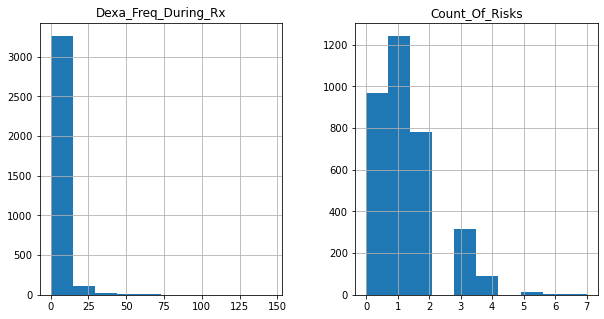

In [17]:
# Histogram distribution of numerical variables

df.hist(figsize=(10,5))
plt.show()

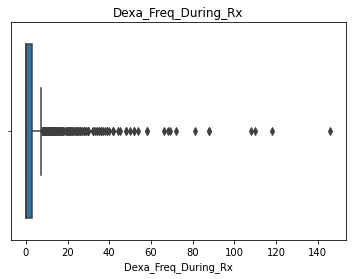

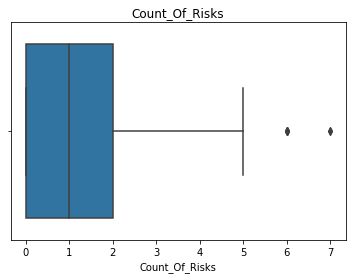

In [18]:
for col in numerical:
    plt.figure()
    sns.boxplot(x = df[col]).set(title= col)

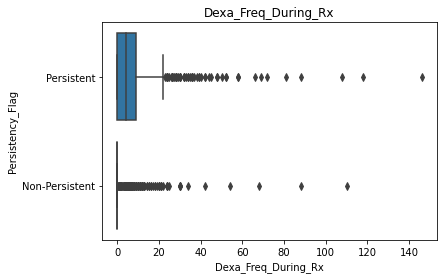

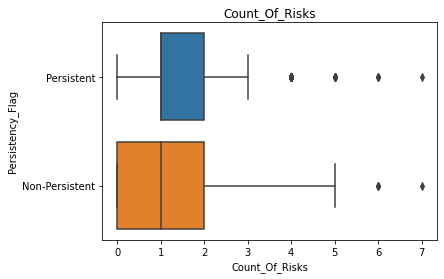

In [19]:
for col in numerical:
    plt.figure()
    sns.boxplot(x = df[col], y=df["Persistency_Flag"]).set(title= col)

Skew and Kurtosis

In [20]:
# measuring skewness and kurtosis of numerical columns
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = df[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(numerical)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


Outlier treatment

In [21]:
# droping outliers using the Inter-Quartile-Range
for col in numerical:
    print(col)
    Q1=df[col].quantile(0.25) #lower quartile
    Q3=df[col].quantile(0.75) #upper quartile
    IQR=Q3-Q1 #inter-quartile-range
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)
    df = df[df[col]< Upper_Whisker]

Dexa_Freq_During_Rx
0.0
3.0
3.0
-4.5 7.5
Count_Of_Risks
0.0
2.0
2.0
-3.0 5.0


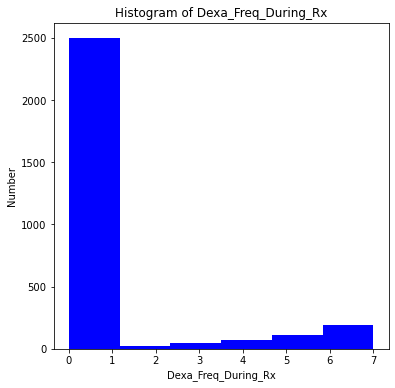

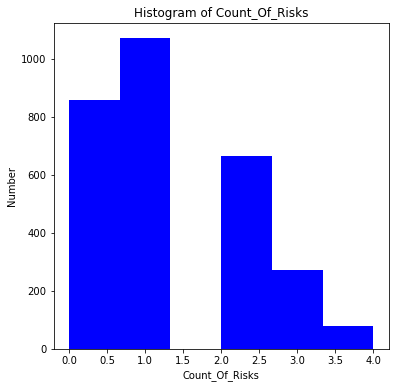

In [22]:
# ploting histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(df, numerical)

Dexa_Freq_During_Rx
                         skew  kurtosis
Dexa_Freq_During_Rx  2.249892  3.486526
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.651706 -0.194379


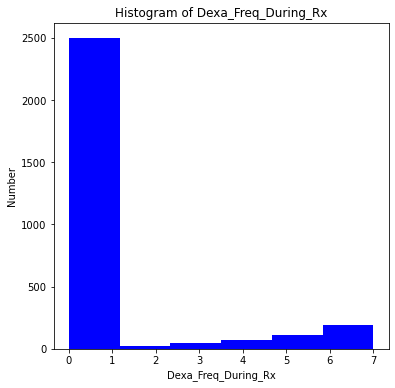

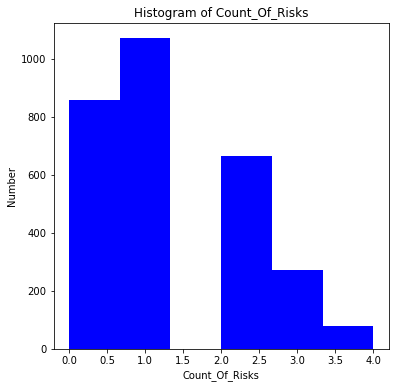

In [23]:
# measuring skewness and plotting the histrogram of numerical columns after removing outliers
measure_skew_kurtosis(numerical) #measure skewness and kurtosis
plot_histogram(df, numerical) # plot histogram

min_max_Dexa_Freq_During_Rx
                                 skew  kurtosis
min_max_Dexa_Freq_During_Rx  2.249892  3.486526


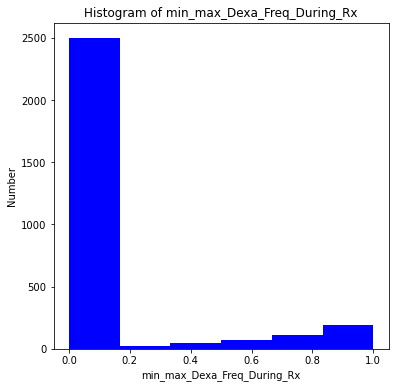

min_max_Count_Of_Risks
                            skew  kurtosis
min_max_Count_Of_Risks  0.651706 -0.194379


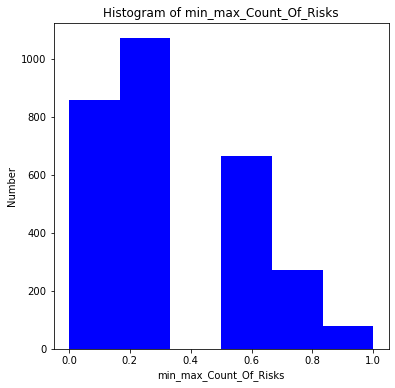

In [24]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_min_max = df.copy() #getting a copy of dataframe
for col in numerical:
    data = np.array(df_min_max[[col]])
    scaler.fit(data)#computing min and max to be used for scaling
    df['min_max_'+col] = scaler.transform(data) 
    measure_skew_kurtosis(['min_max_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['min_max_'+col]) # plot histo

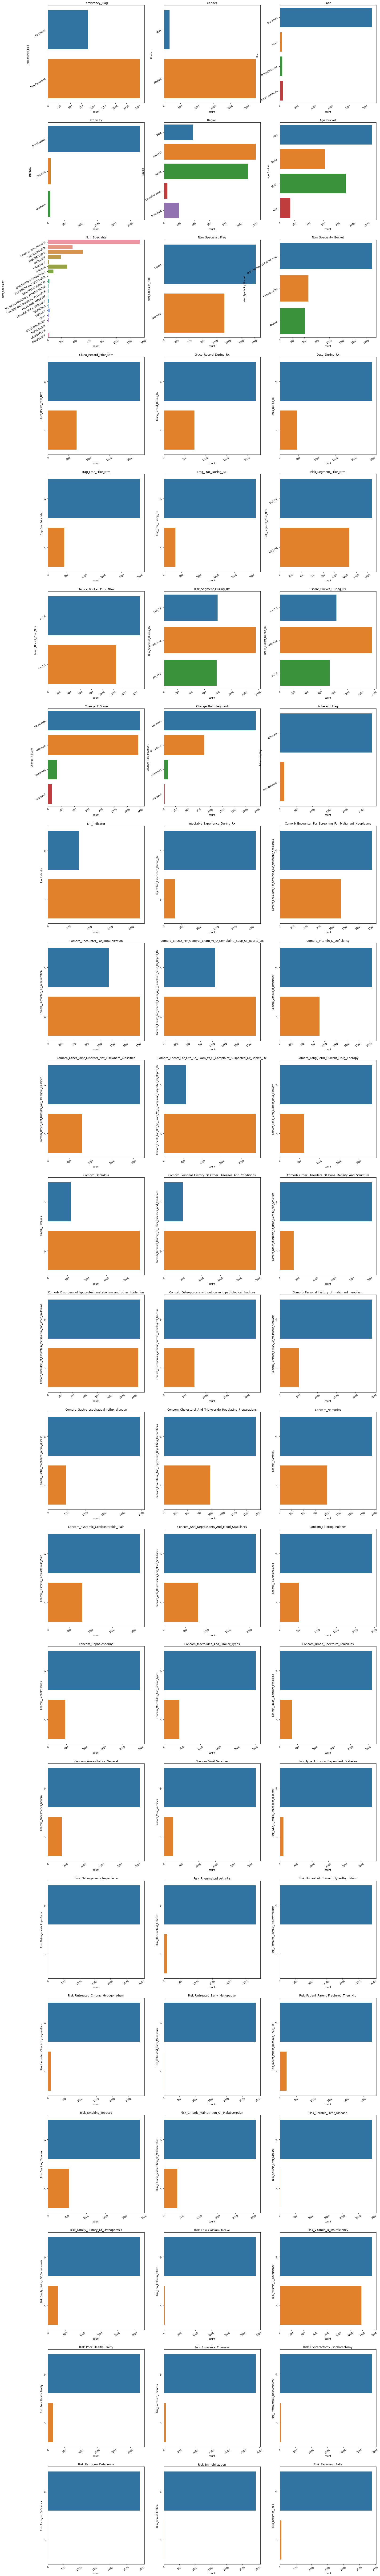

In [25]:
# Count plots of each categorical variable
var_num = len(categorical)
col_num = 3
row_num = math.ceil(var_num/col_num)

f, axes = plt.subplots(ncols=col_num, nrows=row_num, figsize=(25,200))
i = 0
j = 0
for col in categorical:
    sns.countplot(y=df[col], ax=axes[j][i]).set(title=col)
    axes[j][i].tick_params(labelrotation=30)
    i += 1
    if i >= col_num:
        i = 0
        j += 1

Replace 'Unknown' values with mode value

In [26]:
# list columns with Unknown values
columns = df.columns.to_list()
unknown = []
for col in columns:
  arr = df[col].unique()
  if np.where(arr=='Unknown')[0].size != np.array(0):
    unknown.append(col)
  else:
    continue

C:\Users\soniy\AppData\Local\Temp\ipykernel_8824\256844359.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.where(arr=='Unknown')[0].size != np.array(0):


In [27]:
df[unknown].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 3423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ethnicity                2942 non-null   object
 1   Ntm_Speciality           2942 non-null   object
 2   Risk_Segment_During_Rx   2942 non-null   object
 3   Tscore_Bucket_During_Rx  2942 non-null   object
 4   Change_T_Score           2942 non-null   object
 5   Change_Risk_Segment      2942 non-null   object
dtypes: object(6)
memory usage: 225.4+ KB


In [28]:
tempdf = df.copy()
columns = tempdf.columns

In [29]:
tempdf['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                  1345
RHEUMATOLOGY                           509
ENDOCRINOLOGY                          362
Unknown                                283
ONCOLOGY                               187
OBSTETRICS & GYNECOLOGY                 81
UROLOGY                                 29
ORTHOPEDIC SURGERY                      25
CARDIOLOGY                              21
Other                                   21
OTOLARYNGOLOGY                          13
PATHOLOGY                               13
HEMATOLOGY & ONCOLOGY                   12
PHYSICAL MEDICINE & REHABILITATION      11
PEDIATRICS                               9
SURGERY AND SURGICAL SPECIALTIES         8
PULMONARY MEDICINE                       7
PSYCHIATRY AND NEUROLOGY                 3
ORTHOPEDICS                              2
NEPHROLOGY                               1
Name: Ntm_Speciality, dtype: int64

In [30]:
tempdf['Ethnicity'].value_counts()

Not Hispanic    2784
Hispanic          81
Unknown           77
Name: Ethnicity, dtype: int64

In [31]:
templist=[]
# Replace unknown values with mode if it is less than 40% of total values
# Drop if it is greater than 40%
for l in unknown:
    val = tempdf[l].value_counts().Unknown
    if val>len(tempdf)*0.4:
        tempdf.drop(l , axis=1 , inplace=True)
        templist.append(l)
        print(l, " loop is dropped")
    else:
        print("Unknown values in ", l, " loop is replaced with mode")
        tempdf[l].replace(to_replace='Unknown', value=tempdf[l].mode()[0], inplace=True)
tempdf['Race'].replace(to_replace='Other/Unknown', value=tempdf['Race'].mode()[0], inplace=True)

Unknown values in  Ethnicity  loop is replaced with mode
Unknown values in  Ntm_Speciality  loop is replaced with mode
Risk_Segment_During_Rx  loop is dropped
Tscore_Bucket_During_Rx  loop is dropped
Change_T_Score  loop is dropped
Change_Risk_Segment  loop is dropped


In [32]:
tempdf['Ethnicity'].value_counts()


Not Hispanic    2861
Hispanic          81
Name: Ethnicity, dtype: int64

In [33]:
tempdf['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                  1628
RHEUMATOLOGY                           509
ENDOCRINOLOGY                          362
ONCOLOGY                               187
OBSTETRICS & GYNECOLOGY                 81
UROLOGY                                 29
ORTHOPEDIC SURGERY                      25
Other                                   21
CARDIOLOGY                              21
OTOLARYNGOLOGY                          13
PATHOLOGY                               13
HEMATOLOGY & ONCOLOGY                   12
PHYSICAL MEDICINE & REHABILITATION      11
PEDIATRICS                               9
SURGERY AND SURGICAL SPECIALTIES         8
PULMONARY MEDICINE                       7
PSYCHIATRY AND NEUROLOGY                 3
ORTHOPEDICS                              2
NEPHROLOGY                               1
Name: Ntm_Speciality, dtype: int64

In [35]:
tempdf.to_csv("New_data.csv")

Now onwards, we are using the new dataframe, which is cleaned using various steps and techniques.

In [44]:
df2 = pd.read_csv("New_data.csv")
# First column in df2 is just serial number, we can drop that column
df2.drop(columns=df2.columns[0], 
        axis=1, 
        inplace=True)
df2.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,min_max_Dexa_Freq_During_Rx,min_max_Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,0,0.0,0.00
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,0,0.0,0.00
2,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,2,0.0,0.50
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,1,0.0,0.25
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,1,0.0,0.25


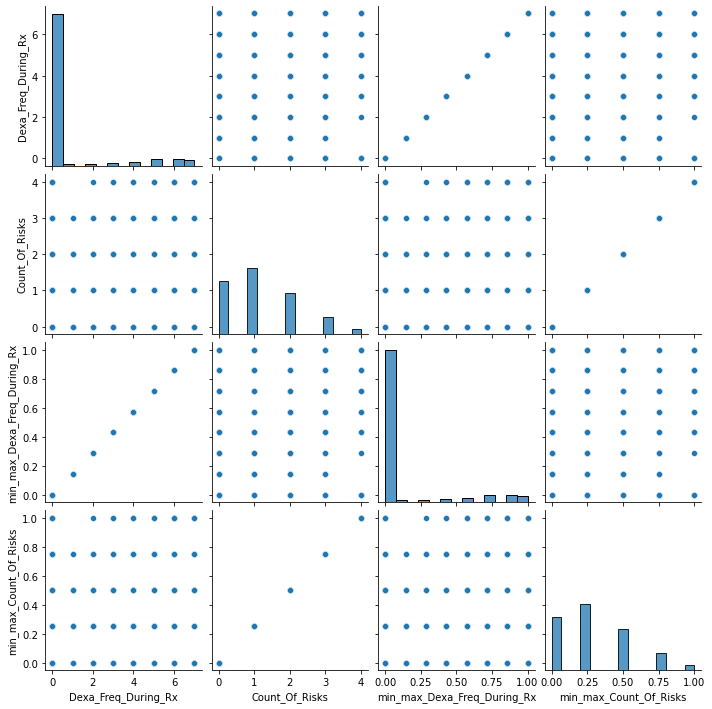

In [43]:
sns.pairplot(df2)

<AxesSubplot:>

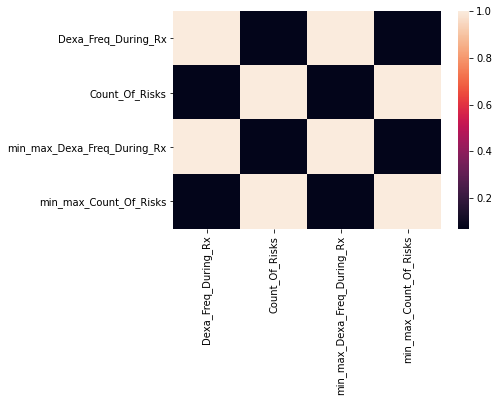

In [45]:
sns.heatmap(df2.corr())